## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

### Defining activation function

In [2]:
def relu(z):
    """Apply rectified linear unit activation to input array."""
    z = (z > 0) * z
    return z

#### Relu:
$$ f(x) = max(0, x)$$

$$ f'(x) = max(0, sign(x))$$

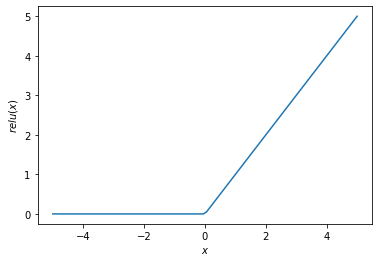

#### Sigmoid

...

## Creating a synthetic dataset

In [3]:
X = np.random.randn(900,2)
beta = np.random.randn(2,1)
y = np.log(X@beta+20) - X[:,1:2]**2 #+ np.random.randn(900,1)

## Visualizing Dataset

Dataset is strictly not viable to fit a linear plane.

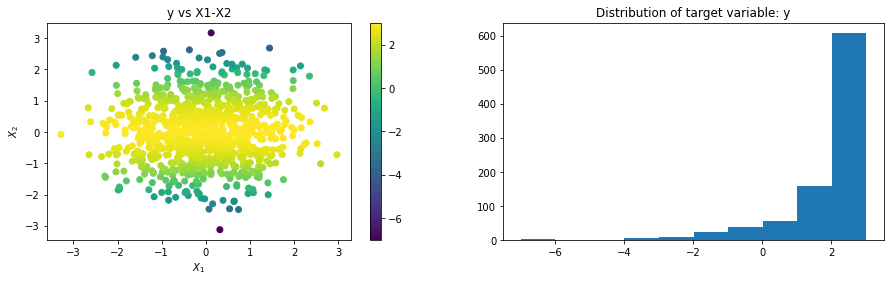

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].scatter(*X.T, c=y.ravel())
ax[0].set_xlabel('$X_1$')
ax[0].set_ylabel('$X_2$')
fig.colorbar(ScalarMappable(norm=Normalize(y.min(), y.max())), ax=ax[0])
ax[0].set_title('y vs X1-X2')
ax[1].set_title('Distribution of target variable: y')
_ = ax[1].hist(y.ravel())

# Defining helper functions

### Batches

A generator object to yield rows of desired batch size from X and y.

In [5]:
def batches(X, batch_size=32):
    """Generate batches from given np.ndarray.
    
    Array must be at least 2-D.
    """
    if batch_size >= X.shape[0]:
        yield X
    else:
        num_iters = (X.shape[0] // batch_size)
        if not (X.shape[0] % batch_size == 0):
            num_iters += 1
        for i in range(num_iters):
            result = X[i * batch_size : (i + 1) * batch_size]
            yield result

## Forward Propagation

Propagate input through network using current parameters. All intermediate layers and $\hat{y}$ is calculated, activations are returned to be used in back-propagation.

In [6]:
def forward_propagate(X, y, W1, b1, W2, b2, W3, b3):
    """Perform one step of forward propagation."""
    A0 = X
    y0 = y
    m = A0.shape[0]

    Z1 = A0 @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = relu(Z2)
    y_pred = A2 @ W3 + b3
    loss = ((y - y_pred)**2).mean()
    
    return loss, y_pred, A1, A2

## Back-propagation

Gradients are propagated back from loss calculated at output using chain rule. Calculated gradients multiplied by a learning rate are used to update parameters to minimize loss.

$$w_i := w_i - \alpha \frac{\partial L}{\partial w_i}$$
$$b_i := b_i - \alpha \frac{\partial L}{\partial b_i}$$

In [7]:
def back_propagate(X, y, y_pred, W1, b1, W2, b2, W3, b3, A1, A2, lr):
    """Perform one step of back-propagation.
    
    Calculates gradients and updates parameters.
    """
    A0 = X
    y0 = y
    m = A0.shape[0]
    
    dy_pred = y_pred - y0
    dA2 = dy_pred @ W3.T
    dZ2 = dA2 * (A2 > 0).astype(float)
    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * (A1 > 0).astype(float)
    
    dW3 = 1 / m * (A2.T @ dy_pred)
    db3 = 1 / m * dy_pred.sum(axis=0, keepdims=True)
    dW2 = 1 / m *(A1.T @ dZ2)
    db2 = 1 / m * dZ2.sum(axis=0, keepdims=True)
    dW1 = 1 / m * (A0.T @ dZ1)
    db1 = 1 / m * dZ1.sum(axis=0, keepdims=True)
    
    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1
    W2 = W2 - lr * dW2
    b2 = b2 - lr * db2
    W3 = W3 - lr * dW3
    b3 = b3 - lr * db3
    
    return W1, b1, W2, b2, W3, b3

## Train neural network

Perform forward and backward propagation for specified number of epochs.

In [8]:
def train_network(X, y, W1, b1, W2, b2, W3, b3, batch_size=32, epochs=1000, lr=0.01, verbose=1):
    """Train neural network and return learned parameters and final loss.
    
    Returns:
    -----------
    params : Tuple[W1, b1, W2, b2, W3, b3]
    loss   : float, computed loss for learnt parameters. 
    """
    loss_history = []
    params = W1, b1, W2, b2, W3, b3
    for epoch in range(epochs):
        for rx, ry in zip(batches(X, batch_size=batch_size), batches(y, batch_size=batch_size)):
            loss, y_pred, A1, A2 = forward_propagate(rx, ry, *params)
            params = back_propagate(rx, ry, y_pred, *params, A1, A2, lr)
            loss_history.append(loss)

        if epoch % 100==0 and verbose:
            loss, y_pred, *_ = forward_propagate(X, y, *params)
            print("Loss:", loss)
    loss, *_ = forward_propagate(X, y, *params)
    return params, loss, loss_history

## Batch Gradient Descent

Slow but certain steps toward minimum loss.

In [9]:
W1 = np.random.randn(2,56)
b1 = np.zeros(shape=(1,56))
W2 = np.random.randn(56,24)
b2 = np.zeros(shape=(1,24))
W3 = np.random.randn(24,1)
b3 = np.zeros(shape=(1,1))

params = W1, b1, W2, b2, W3, b3

In [10]:
%%time
params, loss, loss_history = train_network(X, y, *params, batch_size=900, epochs=101, lr=0.01)

Loss: 23242.04201927881
Loss:

C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in matmul
  # This is added back by InteractiveShellApp.init_path()
C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in matmul
  app.launch_new_instance()
C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in matmul
C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykern

 nan
Wall time: 217 ms


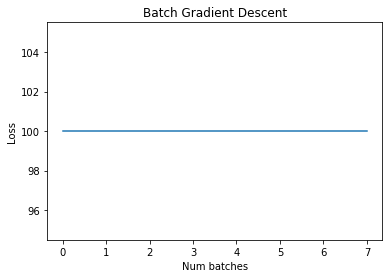

In [11]:
plt.plot(np.clip(loss_history, 0, 100))
plt.title('Batch Gradient Descent')
plt.xlabel('Num batches')
_ = plt.ylabel('Loss')

## Mini-batch Gradient Descent

In [12]:
W1 = np.random.randn(2,56)
b1 = np.zeros(shape=(1,56))
W2 = np.random.randn(56,24)
b2 = np.zeros(shape=(1,24))
W3 = np.random.randn(24,1)
b3 = np.zeros(shape=(1,1))

params = W1, b1, W2, b2, W3, b3

In [13]:
%%time
params, loss, loss_history = train_network(X, y, *params, 32, 101, 0.001)

Loss: 5.33676063235191
Loss: 0.10911680524203321
Wall time: 667 ms


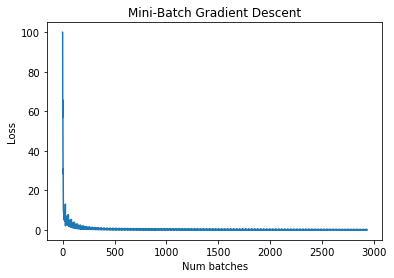

In [14]:
plt.plot(np.clip(loss_history, 0, 100))
plt.title('Mini-Batch Gradient Descent')
plt.xlabel('Num batches')
_ = plt.ylabel('Loss')

## Stochastic Gradient Descent

In [15]:
W1 = np.random.randn(2,56)
b1 = np.zeros(shape=(1,56))
W2 = np.random.randn(56,24)
b2 = np.zeros(shape=(1,24))
W3 = np.random.randn(24,1)
b3 = np.zeros(shape=(1,1))

params = W1, b1, W2, b2, W3, b3

In [16]:
%%time
params, loss, loss_history = train_network(X, y, *params, 1, 101, lr=0.001)

Loss: 0.3586808195536807
Loss: 0.00830861144203042
Wall time: 14 s


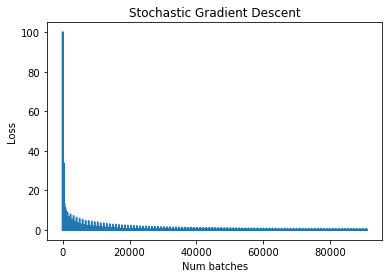

In [17]:
plt.plot(np.clip(loss_history, 0, 100))
plt.title('Stochastic Gradient Descent')
plt.xlabel('Num batches')
_ = plt.ylabel('Loss')

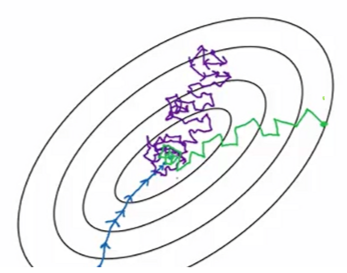

## Creating a synthetic dataset

In [18]:
import numpy as np

In [19]:
x_ = np.linspace(-9, 9, 1000)
y_ = np.linspace(-9, 9, 1000)

In [20]:
def sigmoid(logit):
    logit = np.clip(logit, -1e2, 1e2)
    proba = 1 / (1 + np.exp(-logit))
    return proba

In [21]:
def odd(p):
    return p / (1 - p)

In [22]:
def logit(p):
    return np.log(odd(p))

In [23]:
logit(0.3)

-0.8472978603872036

In [24]:
sigmoid(-0.8472978603872036)

0.30000000000000004

In [25]:
xx, yy = np.meshgrid(x_, y_)

In [26]:
zz = xx**2 - 2*xx + yy**3 + np.log(xx + 70) - 6 * xx * yy

In [27]:
def generate_logit(xx, yy):
    logits = (xx**2 - 2*xx + yy**3 + np.log(xx + 70) - 6 * xx * yy) / 3
    return logits

In [28]:
def generate_probas(xx, yy):
    probas = sigmoid(generate_logit(xx, yy))
    return probas

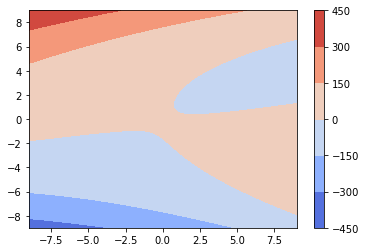

In [29]:
plt.contourf(xx, yy, generate_logit(xx, yy), cmap='coolwarm')
plt.colorbar()

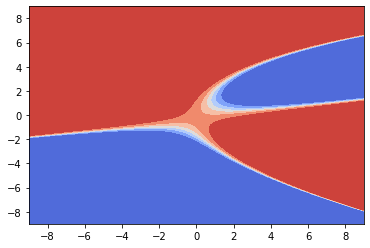

In [30]:
plt.contourf(xx, yy, generate_probas(xx, yy), cmap='coolwarm')

## Generating Dataset

In [31]:
X = np.random.randn(300, 2) * 3

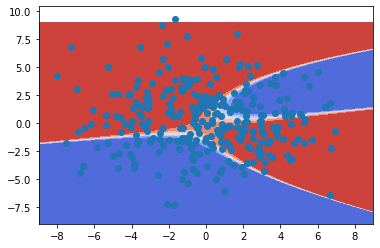

In [32]:
plt.contourf(xx, yy, generate_probas(xx, yy), cmap='coolwarm')
plt.scatter(*X.T)

In [33]:
y_probas = generate_probas(*X.T)

In [34]:
y = np.array(
    [np.random.choice([0, 1], p=[1 - proba, proba])
     for proba in y_probas]
)

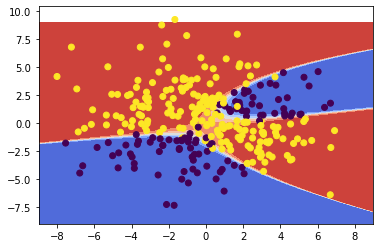

In [35]:
plt.contourf(xx, yy, generate_probas(xx, yy), cmap='coolwarm')
plt.scatter(*X.T, c=y)

# Forward Propagate

In [36]:
def forward_propagate_clf(X, y, W1, b1, W2, b2, W3, b3):
    """Perform one step of forward propagation."""
    A0 = X
    y0 = y
    m = A0.shape[0]
    eps = 1e-9

    Z1 = A0 @ W1 + b1
    A1 = sigmoid(Z1)
#     A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)
#     A2 = relu(Z2)
    Z3 = A2 @ W3 + b3
    
    y_pred = sigmoid(Z3)
    loss = (-y * np.log(y_pred + eps) - (1 - y) * np.log(1 - y_pred + eps)).mean()  # binary cross entropy
    
    return loss, y_pred, A1, A2

## Back-propagation

Gradients are propagated back from loss calculated at output using chain rule. Calculated gradients multiplied by a learning rate are used to update parameters to minimize loss.

$$w_i := w_i - \alpha \frac{\partial L}{\partial w_i}$$
$$b_i := b_i - \alpha \frac{\partial L}{\partial b_i}$$

In [37]:
def back_propagate_clf(X, y, y_pred, W1, b1, W2, b2, W3, b3, A1, A2, lr):
    """Perform one step of back-propagation.
    
    Calculates gradients and updates parameters.
    """
    A0 = X
    y0 = y
    m = A0.shape[0]
    eps = 1e-9
#     loss = (-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)).mean()  # binary cross entropy

    dy_pred = (-y * (1 / y_pred + eps)) - ((1 - y) * ((-1) / (1 - y_pred + eps)))
#     dy_pred = y_pred - y0  # lineer regresyonda bu sekildeydi

#     y_pred = sigmoid(Z3)
    
    dZ3 = (y_pred * (1 - y_pred)) * dy_pred
    dA2 = dZ3 @ W3.T
    dZ2 = dA2 * A2 * (1 - A2)
#     dZ2 = dA2 * (A2 > 0).astype(float)
    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * A1 * (1 - A1)
#     dZ1 = dA1 * (A1 > 0).astype(float)
    
    dW3 = 1 / m * (A2.T @ dy_pred)
    db3 = 1 / m * dy_pred.sum(axis=0, keepdims=True)
    dW2 = 1 / m *(A1.T @ dZ2)
    db2 = 1 / m * dZ2.sum(axis=0, keepdims=True)
    dW1 = 1 / m * (A0.T @ dZ1)
    db1 = 1 / m * dZ1.sum(axis=0, keepdims=True)
    
    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1
    W2 = W2 - lr * dW2
    b2 = b2 - lr * db2
    W3 = W3 - lr * dW3
    b3 = b3 - lr * db3
    
    grads = (dW3,
            db3,
            dW2,
            db2,
            dW1,
            db1)
    
    params = (W1, b1, W2, b2, W3, b3)
    
    return params, grads

## Train neural network

Perform forward and backward propagation for specified number of epochs.

In [38]:
def train_network_clf(X, y, W1, b1, W2, b2, W3, b3, batch_size=32, epochs=1000, lr=0.01, verbose=1):
    """Train neural network and return learned parameters and final loss.
    
    Returns:
    -----------
    params : Tuple[W1, b1, W2, b2, W3, b3]
    loss   : float, computed loss for learnt parameters. 
    """
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    
    loss_history = []
    params = W1, b1, W2, b2, W3, b3
    for epoch in range(epochs):
        for rx, ry in zip(batches(X, batch_size=batch_size), batches(y, batch_size=batch_size)):
            
            loss, y_pred, A1, A2 = forward_propagate_clf(rx, ry, *params)
            
            params, grads = back_propagate_clf(rx, ry, y_pred, *params, A1, A2, lr)
            
            loss_history.append(loss)

        if epoch % 100==0 and verbose:
            loss, y_pred, *_ = forward_propagate_clf(X, y, *params)
            print("Loss:", loss)
            

    loss, *_ = forward_propagate_clf(X, y, *params)
    return params, loss, loss_history

## Initialize Parameters

In [39]:
W1 = np.random.randn(2, 17)
b1 = np.zeros((1, 17))
W2 = np.random.randn(17, 17)
b2 = np.zeros((1, 17))
W3 = np.random.randn(17, 1)
b3 = np.zeros((1, 1))

In [40]:
params, loss, loss_history = train_network_clf(X, y, W1, b1, W2, b2, W3, b3,
                  batch_size=32, epochs=30000, lr=0.001, verbose=1)

Loss: 0.7116761945564194
Loss: 0.6040557891094611
Loss: 0.5719749053872062
Loss: 0.5445598403741969
Loss: 0.521100249571301
Loss: 0.5007044420999747
Loss: 0.48254725539755083
Loss: 0.4660239366332013
Loss: 0.45072981925189914
Loss: 0.43639574959776334
Loss: 0.4228387031487633
Loss: 0.4099337275446067
Loss: 0.39760046289611983
Loss: 0.3857983373576767
Loss: 0.374526397154602
Loss: 0.363823395642798
Loss: 0.3537625125086056
Loss: 0.3444365851903832
Loss: 0.3359357891513706
Loss: 0.3283259840270359
Loss: 0.32163589227243233
Loss: 0.31585506520984763
Loss: 0.31093895574028524
Loss: 0.3068166239068824
Loss: 0.3033988372194287
Loss: 0.30058613029238335
Loss: 0.29827659368023357
Loss: 0.2963726482454213
Loss: 0.2947858526970013
Loss: 0.2934391028885101
Loss: 0.2922660537315608
Loss: 0.29120783927852556
Loss: 0.2902070426067644
Loss: 0.2891985644666902
Loss: 0.2880974198790986
Loss: 0.28678739007924
Loss: 0.28512874778086406
Loss: 0.2830313624978966
Loss: 0.2806275860179623
Loss: 0.27838534020

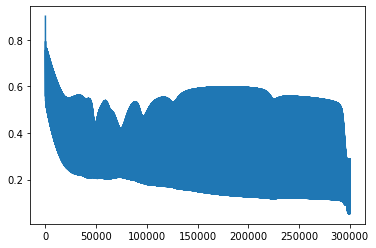

In [41]:
plt.plot(loss_history)

In [42]:
loss, y_pred, A1, A2 = forward_propagate_clf(X, y.reshape(-1, 1), *params)

In [43]:
loss

0.13540401671469382

In [44]:
y_pred[:10]

array([[0.9997045 ],
       [1.        ],
       [0.14431671],
       [0.99850882],
       [0.99947709],
       [0.9030467 ],
       [0.95351271],
       [0.99934371],
       [0.06239729],
       [1.        ]])

In [45]:
(y == (y_pred.ravel() > 0.5)).mean()

0.95

In [46]:
XX = np.array([xx.ravel(), yy.ravel()]).T

In [47]:
XX.shape

(1000000, 2)

In [48]:
zz = forward_propagate_clf(XX, np.ones((XX.shape[0], 1)), *params)

In [49]:
ZZ = zz[1].reshape(xx.shape)

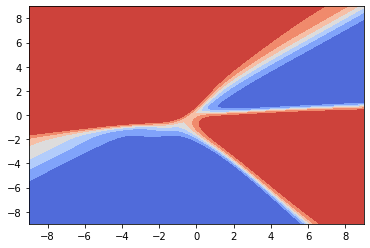

In [50]:
plt.contourf(xx, yy, ZZ, cmap='coolwarm')

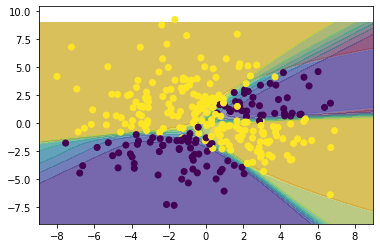

In [51]:
plt.contourf(xx, yy, generate_probas(xx, yy), cmap='coolwarm', alpha=0.5)
plt.contourf(xx, yy, ZZ, alpha=0.5)
plt.scatter(*X.T, c=y)

In [52]:
A2.shape

(300, 17)

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components=2)

In [55]:
A2_pc = pca.fit_transform(A2)

In [56]:
A2_pc.shape

(300, 2)

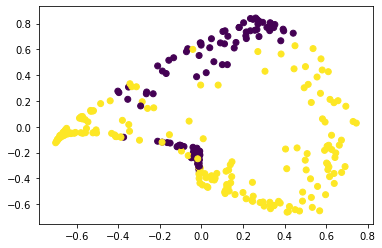

In [57]:
plt.scatter(*A2_pc.T, c=y)

In [58]:
A1_pc = pca.fit_transform(A1)

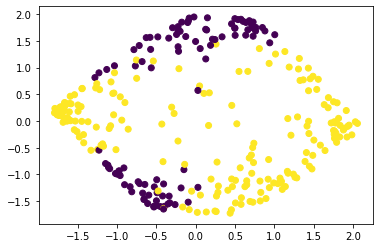

In [59]:
plt.scatter(*A1_pc.T, c=y)

## Implementing ANN with Keras

In [62]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Softmax, Dropout

ModuleNotFoundError: No module named 'keras'

In [ ]:
model = Sequential()

model.add(
    Dense(89, input_shape=(2,), activation=None)
)
model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(89, activation=None))
model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=100, batch_size=64, verbose=0,
          validation_split=0.1)

In [ ]:
plt.plot(model.history.history['loss'], label='train')
plt.plot(model.history.history['val_loss'], label='test')
plt.legend()

In [ ]:
plt.plot(model.history.history['accuracy'], label='train')
plt.plot(model.history.history['val_accuracy'], label='test')
plt.legend()

In [ ]:
y_pred = model.predict_classes(X)

In [ ]:
(y_pred.ravel() == y).mean()